In [1]:
import pandas as pd
import  sys 
sys.path.append("../src/")
import data_preparation as dp

In [2]:
df = pd.read_csv("../data/train.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_32283/3597601614.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/train.csv")


In [3]:
df2 = pd.read_csv("../data/train.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_32283/2946312250.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("../data/train.csv")


In [4]:
df = df.drop(columns=['MMS', 'Vf', 'De', 'Ernedc (g/km)', 'Enedc (g/km)', 'z (Wh/km)', 'Erwltp (g/km)', 'r' , 'Status'])

In [5]:
df['Electric range (km)'].fillna(0, inplace=True)

In [6]:
col_numericals = df.select_dtypes(exclude = ["object"]).columns.to_list()

In [7]:
exp = dp.DataPreparation(df)

In [8]:
exp.get_type_list()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression


def get_variable_correlation(variable, df, col_numericals):
    correlation_vector = df[col_numericals].corr()[variable][:]
    correlation_vector = np.abs(correlation_vector)
    correlation_vector = correlation_vector.sort_values(ascending=False)[1:]

    return(correlation_vector)

def impute_numerical(nan_table, df, col_numericals):

    var_to_impute = nan_table[(nan_table['Type'] == 'Numérique') & (nan_table["Pourcentages de valeurs manquantes"] > 0)]['Variable'].to_list()
    print(var_to_impute)
    for var in var_to_impute:
        index_NAN = df[df[var].isna()].index
        var_explicatives = []

        correlation_vector = get_variable_correlation(var, df, col_numericals)
        var_correlated = correlation_vector.index.to_list()
        if 'ID' in var_correlated : 
            var_correlated.remove("ID")

        for colonne in var_correlated:
            if df[colonne].loc[index_NAN].isna().sum() == 0 :
                var_explicatives.append(colonne)
                if len(var_explicatives) == 3 :
                    break

        print(var_explicatives)
        df_train = df.dropna(how='any')
        
        reg = LinearRegression().fit(df_train[var_explicatives], df_train[var])
        pred = reg.predict(df[var_explicatives].loc[index_NAN])
        df.loc[index_NAN, var] = pred

In [10]:
nan = exp.get_nan_table()

In [11]:
impute_numerical(nan, df, col_numericals)

['Fuel consumption ', 'ec (cm3)', 'Mt', 'At2 (mm)', 'At1 (mm)', 'ep (KW)', 'W (mm)', 'm (kg)']
['Ewltp (g/km)', 'Electric range (km)']
['Ewltp (g/km)', 'Fuel consumption ', 'Electric range (km)']
['ec (cm3)', 'Electric range (km)', 'Fuel consumption ']
['Mt', 'ec (cm3)', 'Electric range (km)']
['At2 (mm)', 'm (kg)', 'Mt']
['Mt', 'At2 (mm)', 'At1 (mm)']
['At2 (mm)', 'At1 (mm)', 'Mt']
['Mt', 'At2 (mm)', 'At1 (mm)']


In [17]:
df.loc[df['Fuel consumption '] <= 0, 'Fuel consumption '] = 0

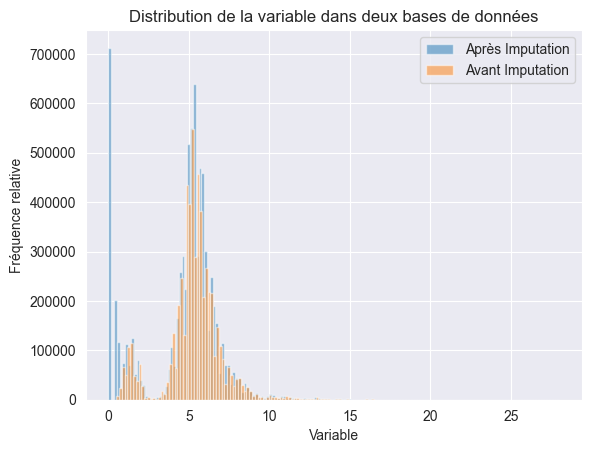

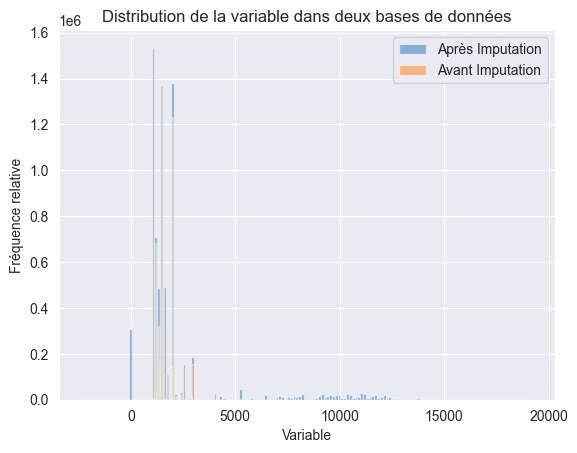

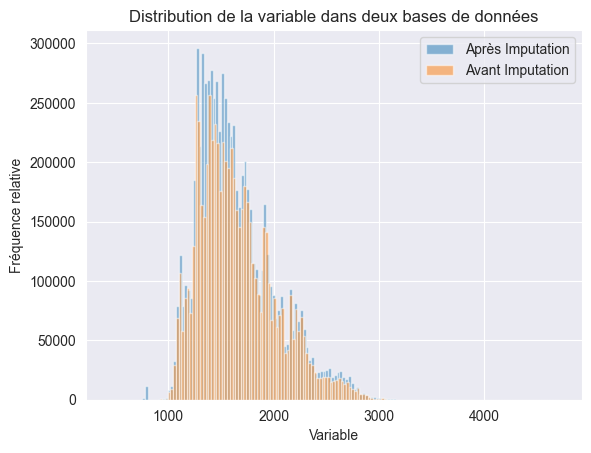

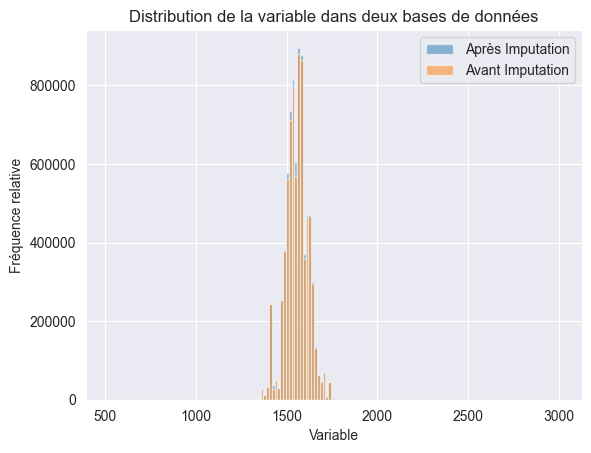

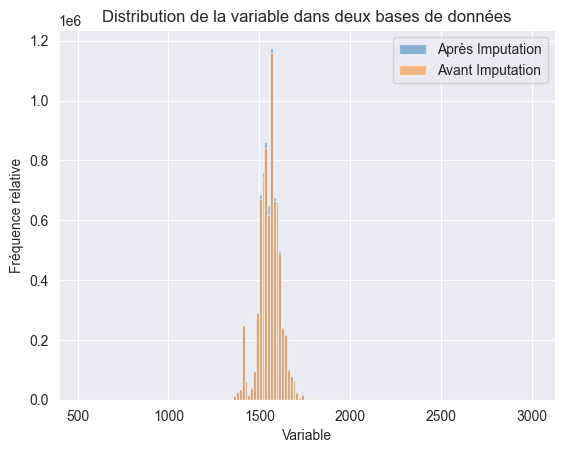

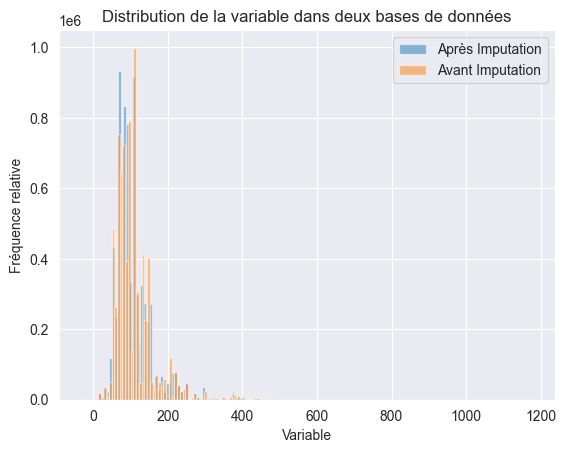

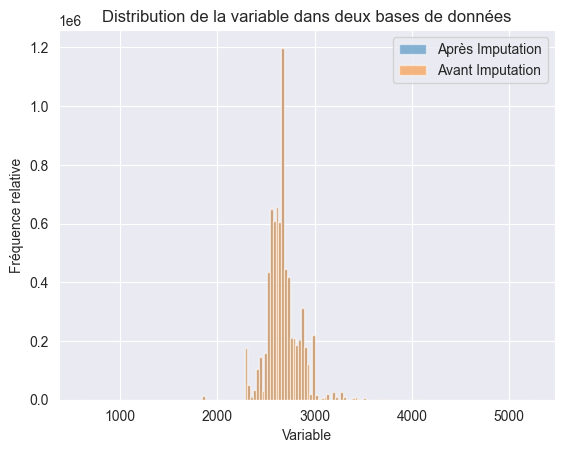

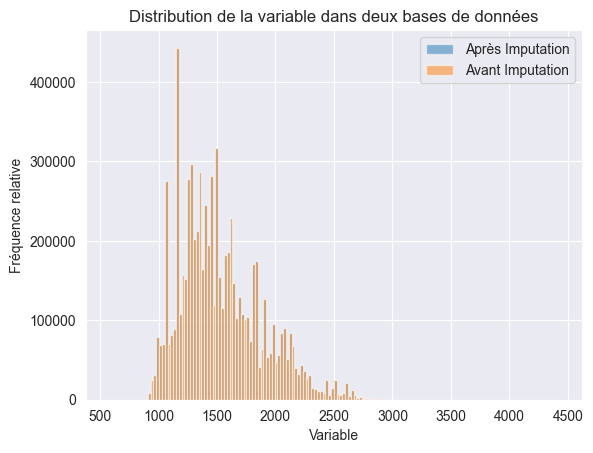

In [18]:
from matplotlib import pyplot as plt

for col in ['Fuel consumption ', 'ec (cm3)', 'Mt', 'At2 (mm)', 'At1 (mm)', 'ep (KW)', 'W (mm)', 'm (kg)'] :
    plt.hist(df[col], bins=160, alpha=0.5, label='Après Imputation')
    
    # Créer un histogramme pour la deuxième base de données
    plt.hist(df2[col], bins=160, alpha=0.5, label='Avant Imputation')
    
    # Personnaliser le graphique
    plt.title('Distribution de la variable dans deux bases de données')
    plt.xlabel('Variable')
    plt.ylabel('Fréquence relative')
    plt.legend()
    
    # Afficher le graphique
    plt.show()

(array([1.38359e+05, 1.75565e+05, 6.32200e+03, 1.66930e+04, 1.28260e+04,
        1.60970e+04, 1.83730e+04, 7.49000e+03, 7.24000e+03, 3.57000e+03,
        1.36100e+03, 1.49400e+03, 5.18000e+02, 3.68000e+02, 2.26800e+03,
        1.36600e+03, 3.08400e+03, 1.36570e+04, 2.68410e+04, 1.94660e+04,
        7.78930e+04, 1.37137e+05, 1.57701e+05, 1.31949e+05, 2.79660e+05,
        3.48718e+05, 5.01554e+05, 3.09262e+05, 6.02243e+05, 5.64301e+05,
        2.99840e+05, 4.27498e+05, 4.07020e+05, 2.48351e+05, 1.25935e+05,
        2.28348e+05, 1.74587e+05, 1.25342e+05, 6.39580e+04, 8.60610e+04,
        8.22400e+04, 2.32410e+04, 5.37660e+04, 5.09110e+04, 4.25180e+04,
        2.63730e+04, 3.14500e+04, 3.26400e+04, 2.12040e+04, 8.92300e+03,
        1.75560e+04, 8.37300e+03, 3.09300e+03, 6.16300e+03, 6.42600e+03,
        9.25700e+03, 7.45600e+03, 9.90300e+03, 5.86500e+03, 4.12300e+03,
        4.34400e+03, 7.95200e+03, 5.41800e+03, 3.44500e+03, 3.41700e+03,
        2.75400e+03, 2.70900e+03, 1.44500e+03, 2.55

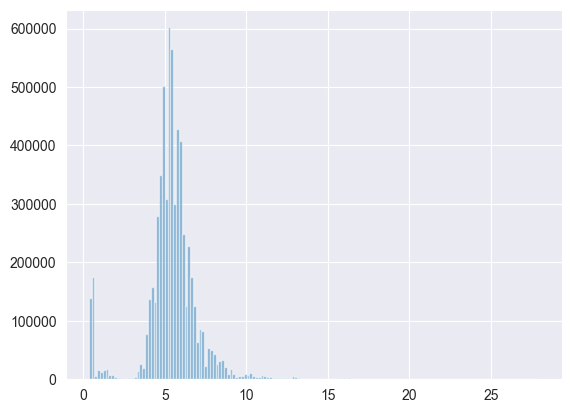

In [21]:
plt.hist(df[df["Electric range (km)"]==0]["Fuel consumption "], bins=160, alpha=0.5, label='Après Imputation')

In [ ]:
plt.hist(df2[df2["Electric range (km)"]>0]["Fuel consumption "], bins=160, alpha=0.5, label='Après Imputation')

In [ ]:
df[df['Fuel consumption '] <= 0] = 0